In [31]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.naive_bayes import GaussianNB 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from skopt import BayesSearchCV
from sklearn.compose import make_column_transformer

from numpy import mean
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from numpy import std
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew, kurtosis
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [33]:
df.rename(columns={'target':'heart attack'},inplace=True)

In [34]:
X = df.drop(columns = ['heart attack'])
y = df['heart attack']

In [31]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [40]:
skew(df.age)

-0.2014596901125439

In [5]:
cols=['chol','age','trestbps','thalach','oldpeak']

In [6]:
for col in df[cols]:
    print("Skew: %s %.3f" % (col,skew(df[col])))
    
   # print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    #print (skew(col))

Skew: chol 1.138
Skew: age -0.201
Skew: trestbps 0.710
Skew: thalach -0.535
Skew: oldpeak 1.263


In [51]:
for col in df.columns:
    print("kurtosis: %s %.3f" % (col,kurtosis(df[col])))

kurtosis: age -0.553
kurtosis: sex -1.380
kurtosis: cp -1.193
kurtosis: trestbps 0.894
kurtosis: chol 4.412
kurtosis: fbs 1.908
kurtosis: restecg -1.360
kurtosis: thalach -0.081
kurtosis: exang -1.454
kurtosis: oldpeak 1.530
kurtosis: slope -0.637
kurtosis: ca 0.806
kurtosis: thal 0.273
kurtosis: heart attack -1.968


<AxesSubplot:xlabel='heart attack', ylabel='count'>

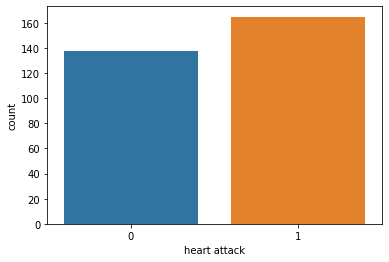

In [11]:
sns.countplot(x='heart attack',data=df)

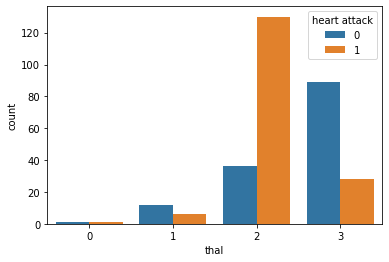

In [29]:
a=sns.countplot(x='thal',hue='heart attack',data=df)

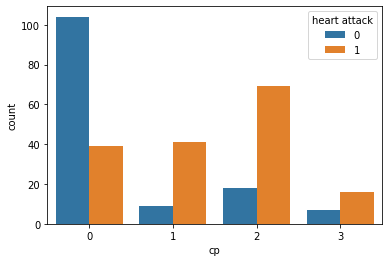

In [30]:
a=sns.countplot(x='cp',hue='heart attack',data=df)

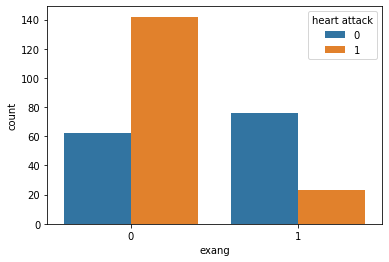

In [52]:
a=sns.countplot(x='exang',hue='heart attack',data=df)

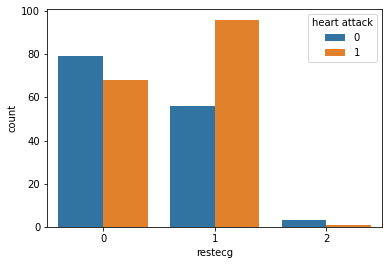

In [14]:
a=sns.countplot(x='restecg',hue='heart attack',data=df)

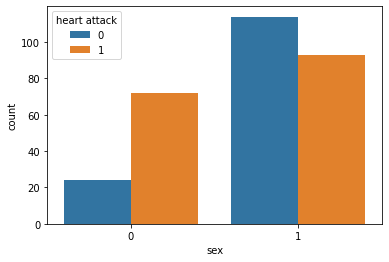

In [15]:
a=sns.countplot(x='sex',hue='heart attack',data=df)

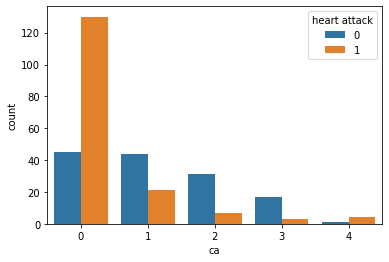

In [16]:
a=sns.countplot(x='ca',hue='heart attack',data=df)

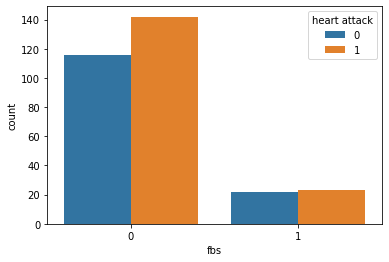

In [27]:
a=sns.countplot(x='fbs',hue='heart attack',data=df)

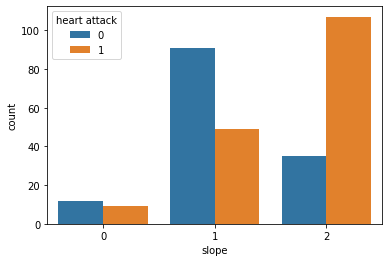

In [17]:
a=sns.countplot(x='slope',hue='heart attack',data=df)

In [5]:
myheart = df['heart attack']
mychol = df['chol']

In [6]:
heart_0 = myheart == 0
heart_1 = myheart == 1

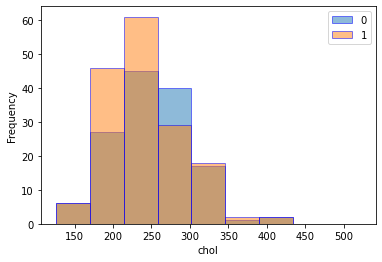

In [9]:
plt.hist(mychol[heart_0], edgecolor='blue', alpha=0.5, bins =range(126,564,44) , label='0')
plt.hist(mychol[heart_1], edgecolor='blue', alpha=0.5, bins = range(126,564,44) , label='1')
plt.legend(loc='upper right')
plt.xlabel('chol')
plt.ylabel('Frequency')
plt.show()

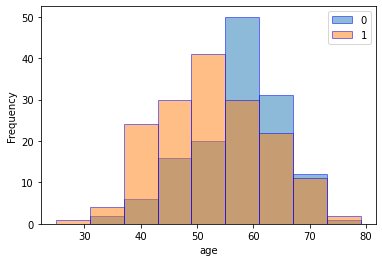

In [8]:
myage = df['age']

plt.hist(myage[heart_0], edgecolor='blue', alpha=0.5, bins = range(25,80,6), label='0')
plt.hist(myage[heart_1], edgecolor='blue', alpha=0.5, bins = range(25,80,6), label='1')
plt.legend(loc='upper right')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

In [18]:
cols=['chol','age','trestbps','thalach','oldpeak']

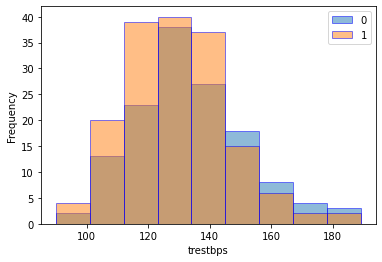

In [10]:
mytrestbps = df['trestbps']

plt.hist(mytrestbps[heart_0], edgecolor='blue', alpha=0.5, bins =  range(90,200,11), label='0')
plt.hist(mytrestbps[heart_1], edgecolor='blue', alpha=0.5, bins = range(90,200,11), label='1')
plt.legend(loc='upper right')
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.show()

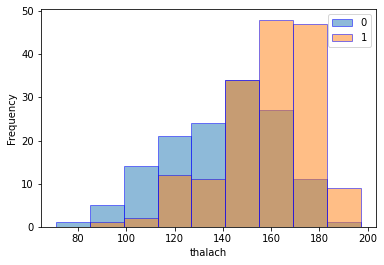

In [11]:
mythalach = df['thalach']

plt.hist(mythalach[heart_0], edgecolor='blue', alpha=0.5, bins = range(71,205,14), label='0')
plt.hist(mythalach[heart_1], edgecolor='blue', alpha=0.5, bins =  range(71,205,14), label='1')
plt.legend(loc='upper right')
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.show()

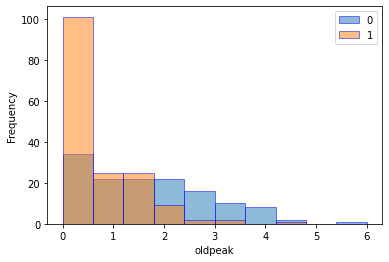

In [13]:
myoldpeak = df['oldpeak']

plt.hist(myoldpeak[heart_0], edgecolor='blue', alpha=0.5, bins = [0,0.6,1.2,1.8,2.4,3,3.6,4.2,4.8,5.4,6], label='0')
plt.hist(myoldpeak[heart_1], edgecolor='blue', alpha=0.5, bins =  [0,0.6,1.2,1.8,2.4,3,3.6,4.2,4.8,5.4,6], label='1')
plt.legend(loc='upper right')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

In [50]:
print(dataset.T[1])

age          52.496970
trestbps    129.303030
chol        242.230303
thalach     158.466667
oldpeak       0.583030
Name: 1, dtype: float64


In [20]:
dataset=df.groupby('heart attack')[cols].mean()

#dataset=df1.groupby('target').mean()

In [ ]:
#Differentiate Discrete and Continuous features
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)
#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

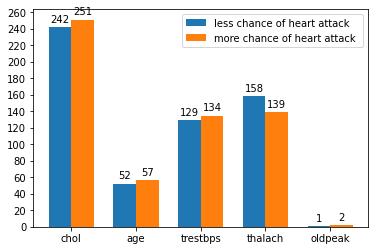

In [22]:
indx=np.arange(len(cols))
score_label=np.arange(0,270,20)

col1=list(dataset.T[1])
col2=list(dataset.T[0])
bar_width=0.35

fig,ax=plt.subplots()
bar_1=ax.bar(indx-bar_width/2, col1, bar_width, label='less chance of heart attack')
bar_2=ax.bar(indx+bar_width/2, col2, bar_width, label='more chance of heart attack ')

#inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(cols)

ax.legend()

#inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(bar_1)
insert_data_labels(bar_2)

plt.show()

In [35]:
def encoding(X):
    column_transformer = make_column_transformer( (OneHotEncoder(), ["slope","ca","thal","cp","restecg"]),remainder='passthrough')
    X = column_transformer.fit_transform(X)
    X = pd.DataFrame(data=X, columns=column_transformer.get_feature_names_out())
    return X

In [36]:
X=encoding(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,stratify=y, random_state=42)

In [37]:
numerical_ix=['remainder__thalach','remainder__age','remainder__trestbps','remainder__chol','remainder__oldpeak']
preprocessor_ = ColumnTransformer(transformers =[('scale',StandardScaler(), numerical_ix)],remainder ='passthrough')

In [8]:
preprocessor_ = ColumnTransformer(transformers =[('scale',StandardScaler(), numerical_ix)],remainder ='passthrough')
def get_models():
    models = dict()
    models['Random forest'] = RandomForestClassifier()
    models['DecisionTree'] = DecisionTreeClassifier()
    models['xgboost'] = xgb.XGBClassifier(random_state=42)
    models['svm'] = Pipeline(steps=[('preprocessor_',preprocessor_),('m',SVC())])
    models['log_reg'] = Pipeline(steps=[('preprocessor_',preprocessor_),('m',LogisticRegression())])
    models['GaussianNB'] = Pipeline(steps=[('preprocessor_',preprocessor_),('m', GaussianNB())])
    models['Adaboost'] = AdaBoostClassifier(random_state=42)

    lr= LogisticRegression()
    dtc = DecisionTreeClassifier() 
    kn=KNeighborsClassifier(n_neighbors=1)
    base_methods=[('pipe_lr', lr),('DecisionTree',dtc),('pipe_Kn',kn)]
    vote_model=VotingClassifier(estimators=base_methods,voting='hard')
    models['Voting'] = Pipeline(steps=[('preprocessor_',preprocessor_),('m',vote_model)])
    return models
 
def evaluate_model(model, X, y):
    cv = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Random forest 0.809 (0.101)
>DecisionTree 0.760 (0.070)
>xgboost 0.806 (0.095)
>svm 0.830 (0.069)
>log_reg 0.843 (0.058)
>GaussianNB 0.731 (0.101)
>Adaboost 0.753 (0.076)
>Voting 0.798 (0.056)


In [8]:
def get_models():
    models = dict()
    for i in range(5,24):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = LogisticRegression()
        models[str(i)] = Pipeline(steps=[("preprocessor_", preprocessor_),('s',rfe),('m',model)])
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10,shuffle=True,random_state=40)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>5 0.806 (0.065)
>6 0.827 (0.058)
>7 0.843 (0.076)
>8 0.831 (0.077)
>9 0.831 (0.073)
>10 0.843 (0.075)
>11 0.839 (0.069)
>12 0.839 (0.062)
>13 0.835 (0.066)
>14 0.831 (0.059)
>15 0.827 (0.064)
>16 0.831 (0.065)
>17 0.823 (0.063)
>18 0.822 (0.059)
>19 0.827 (0.054)
>20 0.831 (0.072)
>21 0.823 (0.058)
>22 0.827 (0.060)
>23 0.839 (0.075)


In [11]:
model=SVC()
import xgboost as xgb
from sklearn.linear_model import Perceptron

def get_models():
    models = dict()    
    rfe = RFE(estimator=LogisticRegression(max_iter=400), n_features_to_select=7)
    models['lr'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('m',model)])
  
    rfe = RFE(estimator=Perceptron(), n_features_to_select=7)  
    models['per'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('m',model)])
    
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=7)
    models['dtc'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('m',model)])
    
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7)
    models['rf'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('m',model)])
    
    rfe = RFE(estimator=xgb.XGBClassifier(), n_features_to_select=7)
    models['xgb'] = Pipeline(steps=[('preprocessor_',preprocessor_),('rfe',rfe),('m',model)])

    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10,shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.810 (0.072)
>per 0.785 (0.083)
>dtc 0.790 (0.098)
>rf 0.760 (0.062)
>xgb 0.794 (0.075)


In [12]:
solver=['newton-cg', 'lbfgs', 'liblinear']

random_grid = {#'rfe__estimator__C':[0.001,0.01,0.1,1,10,100,1000],'rfe__estimator__solver':solver,
               #'rfe__n_features_to_select':[4,5,6,7,8],
               'model__C': [0.01,0.1, 1, 10, 100, 1000],
               'model__gamma': [1, 0.1, 0.01, 0.001, 0.0001],'model__kernel': ['rbf']}

rfe = RFE(estimator=LogisticRegression(max_iter=400))
model = SVC()

model_pipeline = Pipeline(steps =[("preprocessor_", preprocessor_),
                                  #        ('rfe',rfe),
                                  ('model', model)])
cv = KFold(n_splits=10,shuffle=True)
opt = BayesSearchCV( model_pipeline,[(random_grid, 20)],cv=cv,scoring='accuracy')
opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

OrderedDict([('model__C', 10.0), ('model__gamma', 0.001), ('model__kernel', 'rbf')])
0.8428333333333333


In [24]:
solver=['newton-cg', 'lbfgs', 'liblinear']
n_estimators=[150,200,250,300,450]
max_features = ['auto', 'sqrt']
min_samples_split = [2,5, 10]
min_samples_leaf = [1, 2,3, 4]
bootstrap = [True, False]
random_grid = {#'rfe__estimator__C':[0.001,0.01,0.1,1,10,100,1000],'rfe__estimator__solver':solver,
               #'rfe__n_features_to_select':[5,6,7,8,9],
               'model__solver':solver,'model__C':[0.001,0.01,0.1,1,10,100,1000]}

rfe = RFE(estimator=LogisticRegression(max_iter=400))
model = LogisticRegression(max_iter=400)

model_pipeline = Pipeline(steps =[("preprocessor_", preprocessor_),
                                               ('rfe',rfe),('model', model)])
cv = KFold(n_splits=10,shuffle=True)
opt = BayesSearchCV( model_pipeline,[(random_grid, 30)],cv=cv,scoring='accuracy')
opt.fit(X_train, y_train)

print(opt.best_params_)
print(opt.best_score_)

C:\Users\ANESTIS\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\ANESTIS\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\ANESTIS\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\ANESTIS\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Users\ANESTIS\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
C:\Us

OrderedDict([('model__C', 0.01), ('model__solver', 'liblinear')])
0.8511666666666666


In [40]:
#rfe = RFE(estimator=LogisticRegression(C=0.01,solver='liblinear',max_iter=400), n_features_to_select=8) #SVC
rfe = RFE(estimator=LogisticRegression(C=0.01,solver='newton-cg',max_iter=400), n_features_to_select=7) #LR

#model = LogisticRegression(C=0.01,solver='liblinear',max_iter=400)#without rfe
#model = LogisticRegression()#without rfe
model = LogisticRegression(C=0.1,solver='lbfgs',max_iter=400)#with rfe

#model=SVC()
#model = SVC(C=10,gamma=0.001)#without rfe
#model= SVC(C=10,gamma=0.001)#with rfe

pipeline_model = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe',rfe),('model',model)])

#pipeline_model = Pipeline(steps=[ ("preprocessor_", preprocessor_),('model',model)])

pipeline_model.fit(X_train, y_train)

y_pred_train=pipeline_model.predict(X_train)

conf_pred_train=confusion_matrix(y_train,y_pred_train)
print(conf_pred_train)

score_train=accuracy_score(y_train,y_pred_train)
print(" Accuracy on training set are {}".format(score_train))
y_pred_test = pipeline_model.predict(X_test)

conf_pred_test = confusion_matrix(y_test, y_pred_test) 
print(conf_pred_test)

score=accuracy_score(y_test,y_pred_test)
print(" Accuracy on test set are {}".format(score))
print(classification_report(y_test, y_pred_test))

[[ 88  22]
 [ 14 118]]
 Accuracy on training set are 0.8512396694214877
[[19  9]
 [ 1 32]]
 Accuracy on test set are 0.8360655737704918
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61



In [41]:
recall_sensitivity = recall_score(y_test, y_pred_test, pos_label=1)

recall_specificity = recall_score(y_test, y_pred_test, pos_label=0)

recall_sensitivity, recall_specificity 

(0.9696969696969697, 0.6785714285714286)

In [8]:
rfe_svc = RFE(estimator=LogisticRegression(C=0.01,solver='liblinear',max_iter=400), n_features_to_select=8) #SVC
rfe_lr = RFE(estimator=LogisticRegression(C=0.01,solver='newton-cg',max_iter=400), n_features_to_select=7) #LR

model_svc= SVC(C=10,gamma=0.001,probability=True)#with rfe
pipeline_model_svc = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe_svc',rfe_svc),('model_svc',model_svc)])

model_lr = LogisticRegression(C=0.1,solver='lbfgs',max_iter=400)#with rfe
pipeline_model_lr = Pipeline(steps=[ ("preprocessor_", preprocessor_),('rfe_lr',rfe_lr),('model_lr',model_lr)])

In [10]:
model_lr=pipeline_model_lr.fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_svc =  pipeline_model_svc.fit(X_train, y_train)
probs_svc = model_svc.predict_proba(X_test)[:, 1]

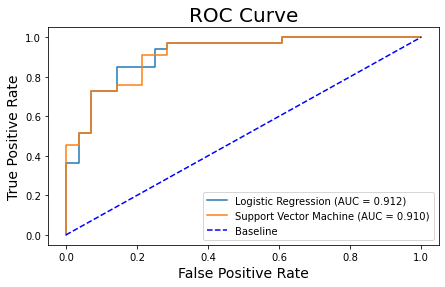

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve

auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_svc = roc_auc_score(y_test, probs_svc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, probs_svc)

plt.figure(figsize=(7, 4))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_svc, tpr_svc, label=f'Support Vector Machine (AUC = {auc_svc:.3f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [15]:
rfe = RFE(estimator=LogisticRegression(C=0.01,solver='liblinear',max_iter=400), n_features_to_select=8) #SVC
#rfe = RFE(estimator=LogisticRegression(C=0.01,solver='newton-cg',max_iter=400), n_features_to_select=7) #LR

fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print(X_train.columns[rfe.support_])

Num Features: 8
Selected Features: [False False  True False False  True  True  True False  True False False
 False False False False False False False False  True  True  True]
Feature Ranking: [14  4  1 15 11  1  1  1  3  1  5  7  2 16  8  6 10 13 12  9  1  1  1]
Index(['onehotencoder__slope_2', 'onehotencoder__thal_2',
       'onehotencoder__thal_3', 'onehotencoder__cp_0', 'onehotencoder__cp_2',
       'remainder__exang', 'remainder__oldpeak', 'remainder__ca'],
      dtype='object')
